In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Import dataset from Local drive
from google.colab import files
uploaded = files.upload()

Saving clustering.csv to clustering (1).csv


In [ ]:
#Fetch dataset
dataset = pd.read_csv('clustering.csv')
dataset.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
0,Hargrave,619,France,Female,42.0,2.0,0.00,1.0,1.0,101348.88
1,Hill,608,Spain,Female,41.0,1.0,83807.86,0.0,1.0,112542.58
2,Onio,502,France,Female,42.0,8.0,159660.80,1.0,0.0,113931.57
3,Boni,699,France,Female,39.0,1.0,0.00,0.0,0.0,93826.63
4,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1.0,1.0,79084.10


In [ ]:
print(dataset)

        Surname  CreditScore  ... IsActiveMember EstimatedSalary
0      Hargrave          619  ...            1.0       101348.88
1          Hill          608  ...            1.0       112542.58
2          Onio          502  ...            0.0       113931.57
3          Boni          699  ...            0.0        93826.63
4      Mitchell          850  ...            1.0        79084.10
...         ...          ...  ...            ...             ...
4498   Obijiaku          771  ...            0.0        96270.64
4499  Johnstone          516  ...            1.0       101699.77
4500        Liu          709  ...            1.0        42085.58
4501  Sabbatini          772  ...            0.0        92888.52
4502     Walker          792  ...            0.0        38190.78

[4503 rows x 10 columns]


In [ ]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          4503 non-null   object 
 1   CreditScore      4503 non-null   int64  
 2   Geography        4503 non-null   object 
 3   Gender           4498 non-null   object 
 4   Age              4497 non-null   float64
 5   Tenure           4500 non-null   float64
 6   Balance          4488 non-null   float64
 7   HasCrCard        4499 non-null   float64
 8   IsActiveMember   4501 non-null   float64
 9   EstimatedSalary  4494 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 351.9+ KB


In [ ]:
dataset.isnull().sum()

Surname             0
CreditScore         0
Geography           0
Gender              5
Age                 6
Tenure              3
Balance            15
HasCrCard           4
IsActiveMember      2
EstimatedSalary     9
dtype: int64

In [ ]:
dataset.Gender = dataset.Gender.fillna("Male")

In [ ]:
dataset.isnull().sum()

Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 6
Tenure              3
Balance            15
HasCrCard           4
IsActiveMember      2
EstimatedSalary     9
dtype: int64

In [ ]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:,0:8].values
# Extracting dependent variable:
y = dataset.iloc[:,9].values

In [ ]:
#Handling missing data (Replacing missing data with the mean value)  
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=1, copy=True)
#Fitting imputer object to the independent variables x.   
imputer = imputer.fit(X[:, 4:9]) 
#Replacing missing data with the calculated mean value  
X[:, 4:9]= imputer.transform(X[:, 4:9])

In [ ]:
dataset.isnull().sum()

Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 6
Tenure              3
Balance            15
HasCrCard           4
IsActiveMember      2
EstimatedSalary     9
dtype: int64

In [ ]:
dataset = dataset.dropna()
dataset

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
0,Hargrave,619,France,Female,42.0,2.0,0.00,1.0,1.0,101348.88
1,Hill,608,Spain,Female,41.0,1.0,83807.86,0.0,1.0,112542.58
2,Onio,502,France,Female,42.0,8.0,159660.80,1.0,0.0,113931.57
3,Boni,699,France,Female,39.0,1.0,0.00,0.0,0.0,93826.63
4,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
4498,Obijiaku,771,France,Male,39.0,5.0,0.00,1.0,0.0,96270.64
4499,Johnstone,516,France,Male,35.0,10.0,57369.61,1.0,1.0,101699.77
4500,Liu,709,France,Female,36.0,7.0,0.00,0.0,1.0,42085.58
4501,Sabbatini,772,France,Male,42.0,3.0,75075.31,1.0,0.0,92888.52


In [ ]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
dataset['Geography']=number.fit_transform(dataset['Geography'].astype('str'))
dataset['Gender']=number.fit_transform(dataset['Gender'].astype('str'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4466 entries, 0 to 4502
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          4466 non-null   object 
 1   CreditScore      4466 non-null   int64  
 2   Geography        4466 non-null   int64  
 3   Gender           4466 non-null   int64  
 4   Age              4466 non-null   float64
 5   Tenure           4466 non-null   float64
 6   Balance          4466 non-null   float64
 7   HasCrCard        4466 non-null   float64
 8   IsActiveMember   4466 non-null   float64
 9   EstimatedSalary  4466 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 383.8+ KB


In [ ]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:,1:9].values

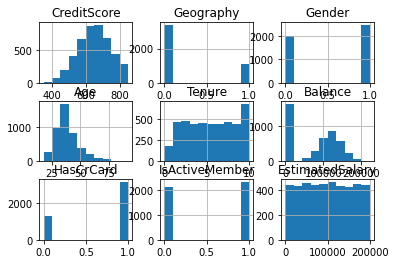

In [ ]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

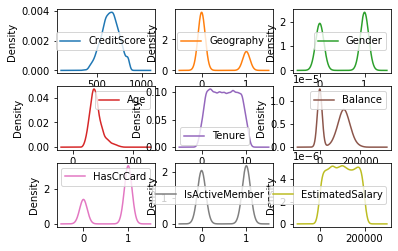

In [ ]:
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [ ]:
# Extracting features of dataset

X = dataset.iloc[:,1:9].values

In [ ]:
print(X)

[[6.1900000e+02 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.0000000e+00]
 [6.0800000e+02 1.0000000e+00 0.0000000e+00 ... 8.3807860e+04
  0.0000000e+00 1.0000000e+00]
 [5.0200000e+02 0.0000000e+00 0.0000000e+00 ... 1.5966080e+05
  1.0000000e+00 0.0000000e+00]
 ...
 [7.0900000e+02 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [7.7200000e+02 0.0000000e+00 1.0000000e+00 ... 7.5075310e+04
  1.0000000e+00 0.0000000e+00]
 [7.9200000e+02 0.0000000e+00 0.0000000e+00 ... 1.3014279e+05
  1.0000000e+00 0.0000000e+00]]


In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
Z = linkage(X, 'ward')


In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
print('The cophentic correlation distance for ward method ',    c)
print(' The cophenetic distance matrix in condensed form for ward method ',    coph_dists)

The cophentic correlation distance for ward method  0.8956234162132144
 The cophenetic distance matrix in condensed form for ward method  [5.45605608e+06 5.45605608e+06 1.39627875e+03 ... 5.45605608e+06
 5.45605608e+06 1.76286588e+06]


In [ ]:
A = linkage(X, 'average')

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(A, pdist(X))
print('The cophentic correlation distance for average method ',    c)
print(' The cophenetic distance matrix in condensed form for average method ',    coph_dists)

The cophentic correlation distance for average method  0.9071904243757546
 The cophenetic distance matrix in condensed form for average method  [119998.04022446 119998.04022446    150.21097464 ... 119998.04022446
 119998.04022446  42132.23217628]


In [ ]:
C = linkage(X, 'complete')

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(C, pdist(X))
print('The cophentic correlation distance for complete method ',    c)
print(' The cophenetic distance matrix in condensed form for complete method ',    coph_dists)

The cophentic correlation distance for complete method  0.8292154096581642
 The cophenetic distance matrix in condensed form for complete method  [ 93259.96578696 222267.98894312    501.70608926 ...  93259.96578696
 222267.98894312 222267.98894312]


In [ ]:
Ce = linkage(X, 'centroid')

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Ce, pdist(X))
print('The cophentic correlation distance for centrid method ',    c)
print(' The cophenetic distance matrix in condensed form for centroid method ',    coph_dists)

The cophentic correlation distance for centrid method  0.9034247921379984
 The cophenetic distance matrix in condensed form for centroid method  [119853.44915983 119853.44915983    157.37716174 ... 119853.44915983
 119853.44915983  45790.16184941]


In [ ]:
S = linkage(X, 'single')

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(S, pdist(X))
print('The cophentic correlation distance for single method ',    c)
print(' The cophenetic distance matrix in condensed form for single method ',    coph_dists)

The cophentic correlation distance for single method  0.8652143270810924
 The cophenetic distance matrix in condensed form for single method  [1.97348464e+04 1.97348464e+04 4.00000000e+00 ... 1.97348464e+04
 1.97348464e+04 4.64999829e+02]


In [ ]:
Z[0]

array([6.30e+01, 3.42e+03, 1.00e+00, 2.00e+00])

In [ ]:
dataset.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [ ]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(X)

In [ ]:

print(y_hc)

[1 0 0 ... 1 0 0]


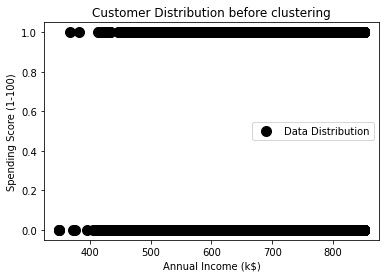

In [ ]:
# Visualising the clusters
plt.scatter(X[:,0], X[:,1], s = 100, c = 'black', label = 'Data Distribution')
plt.title('Customer Distribution before clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

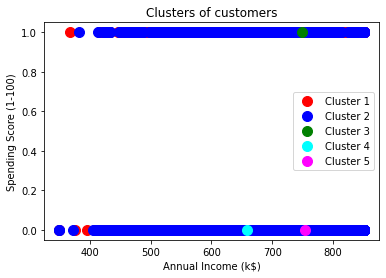

In [ ]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

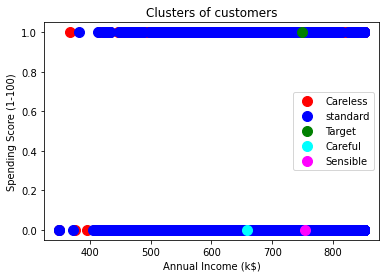

In [ ]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careless')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careful')
plt.scatter(X[y_hc== 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
frame = pd.DataFrame(X)
frame['cluster'] = y_hc
frame['cluster'].value_counts()

0    2830
1    1633
3       1
2       1
4       1
Name: cluster, dtype: int64

In [ ]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
print(y_hc)

[3 2 0 ... 3 4 1]


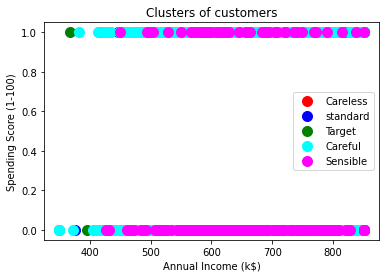

In [ ]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careless')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careful')
plt.scatter(X[y_hc== 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
print(y_hc)

[3 2 0 ... 3 4 1]


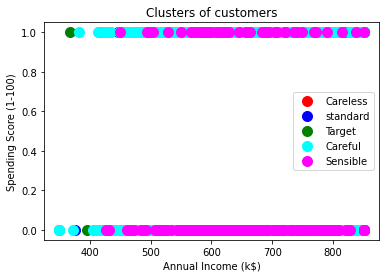

In [ ]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careless')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careful')
plt.scatter(X[y_hc== 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage='average')
y_hc = hc.fit_predict(X)

In [ ]:
print(y_hc)

[4 0 1 ... 4 0 1]


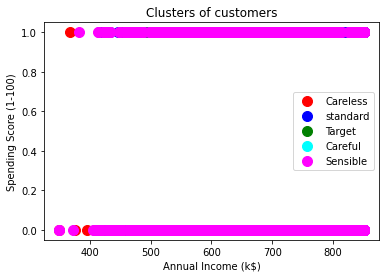

In [ ]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careless')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careful')
plt.scatter(X[y_hc== 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(hc) 
  
# Load the pickled model 
Saved_Model = pickle.loads(saved_model) 
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import joblib
filename = '/content/drive/My Drive/hc_Model_customer_segmentaion.sav'
joblib.dump(hc, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)

In [ ]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(hc,open('/content/drive/My Drive/hccluster.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [ ]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/hccluster.pkl','rb'))  
# Use the loaded pickled model to make predictions 


In [ ]:
!pip install streamlit

     |████████████████████████████████| 7.8MB 5.1MB/s 
     |████████████████████████████████| 4.2MB 13.0MB/s 
     |████████████████████████████████| 174kB 34.3MB/s 
     |████████████████████████████████| 112kB 47.0MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 122kB 45.9MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 788kB 31.5MB/s 
     |████████████████████████████████| 368kB 45.1MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=c0203aea4e50d4a8d11d9801d66f434412217013aa686d2118676cbfcf5b3cdc
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipyke

In [ ]:
!pip install pyngrok

     |████████████████████████████████| 747kB 4.1MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=2f094c1ce814781a9514f6a32886e65709b0c75f26ea866a0bc1edf6719f715b
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:
!ngrok authtoken 1rh7vlXXZxc7RJ8rPFV1UzSbAdN_49pPNkGSrCEHw2GdRsNJp

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:

%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
model = pickle.load(open('/content/drive/My Drive/hccluster.pkl', 'rb'))
dataset= pd.read_csv('/content/drive/My Drive/clustering.csv',)
X = dataset.iloc[:, [2,3,4,5,6,7,8,9]].values
def predict_note_authentication(CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary):
  output= model.predict([[CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary]])
  if output==[0]:
    prediction="Stay"
  else:
    prediction="Leave"
  print(prediction)
  return prediction

def main():
    
    html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">PIET</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">ML LAB</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;">Experiment</p></center> 
   </div>
   </div>
   </div>
   """
    st.markdown(html_temp,unsafe_allow_html=True)
    st.header("Practical ")

    CreditScore = st.number_input("Insert Clonesize",0.0,40.0)
    Geography = st.number_input("Insert 0 , 1 ,2")
    Gender = st.number_input("Insert 0 or 1")
    Age = st.number_input("Insert age",0.0,70.0)
    Tenure = st.number_input("Insert Teure",0.0,1000.0)
    Balance = st.number_input("Insert Balance",0.0,1000000.0)
    HasCrCard = st.number_input("Insert hascrcard",0.0,1.0)
    IsActiveMember = st.number_input("Insert 0 for not and 1 for yes")
    EstimatedSalary = st.number_input("Insert Salary",100.0,10000.0)
    result=""

    if st.button("Prediction"):
      result=predict_note_authentication(CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary)
      st.success('The predicted yeild is {}'.format(result))

    if st.button("About"):
      st.header("By Prakhar Mehrishi")
      st.subheader("CS, piet")
    html_temp = """
    <div class="" style="background-color:orange;" >
    <div class="clearfix">           
    <div class="col-md-12">
    <center><p style="font-size:20px;color:white;margin-top:10px;">Yield Predictor</p></center> 
    </div>
    </div>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
if __name__=='__main__':
  main()

Writing app.py


In [ ]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://f6de7bf68aaa.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.201.228.198:80

2021-07-06 11:22:57.659 Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/streamlit/script_runner.py", line 349, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 62, in <module>
    main()
  File "/content/app.py", line 45, in main
    result=predict_note_authentication(CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary)
  File "/content/app.py", line 13, in predict_note_authentication
    output= model.predict([[CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary]])
AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

